<h2> Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import warnings
from scipy.stats import skew
from scipy import stats

In [43]:
warnings.filterwarnings('ignore') #to ignore warnings

<h2>Reading the dataset

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h5> This dataset shows how eatures such as Pregnancies, Glucose, Blood Pressure, BMI, and more can be used to indicate if a individual has diabetes or not.
<h5> The column Outcome tells if the individual has Diabetes or not where 1 stands for has diabetes and 0 stands for doesnt have diabetes.
<h5> At a glance individuals with Glucose level 110 can be seen having Diabetes.

In [5]:
data.shape

(768, 9)

<h5> The dataset contains 9 columns and 768 rows

<h2> Getting the statistical details

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<h5> Since all the column contains 768 non null values. We can conclude that there is no null values in the data set.
<h5> All the data are in numerical format moslty integer abd 2 floating values.
<h5> Even Though there is no null value its better to check if the data has duplicate values

In [45]:
data.duplicated().sum()

0

<h5> Hence the data doesnt have any duplicate values

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

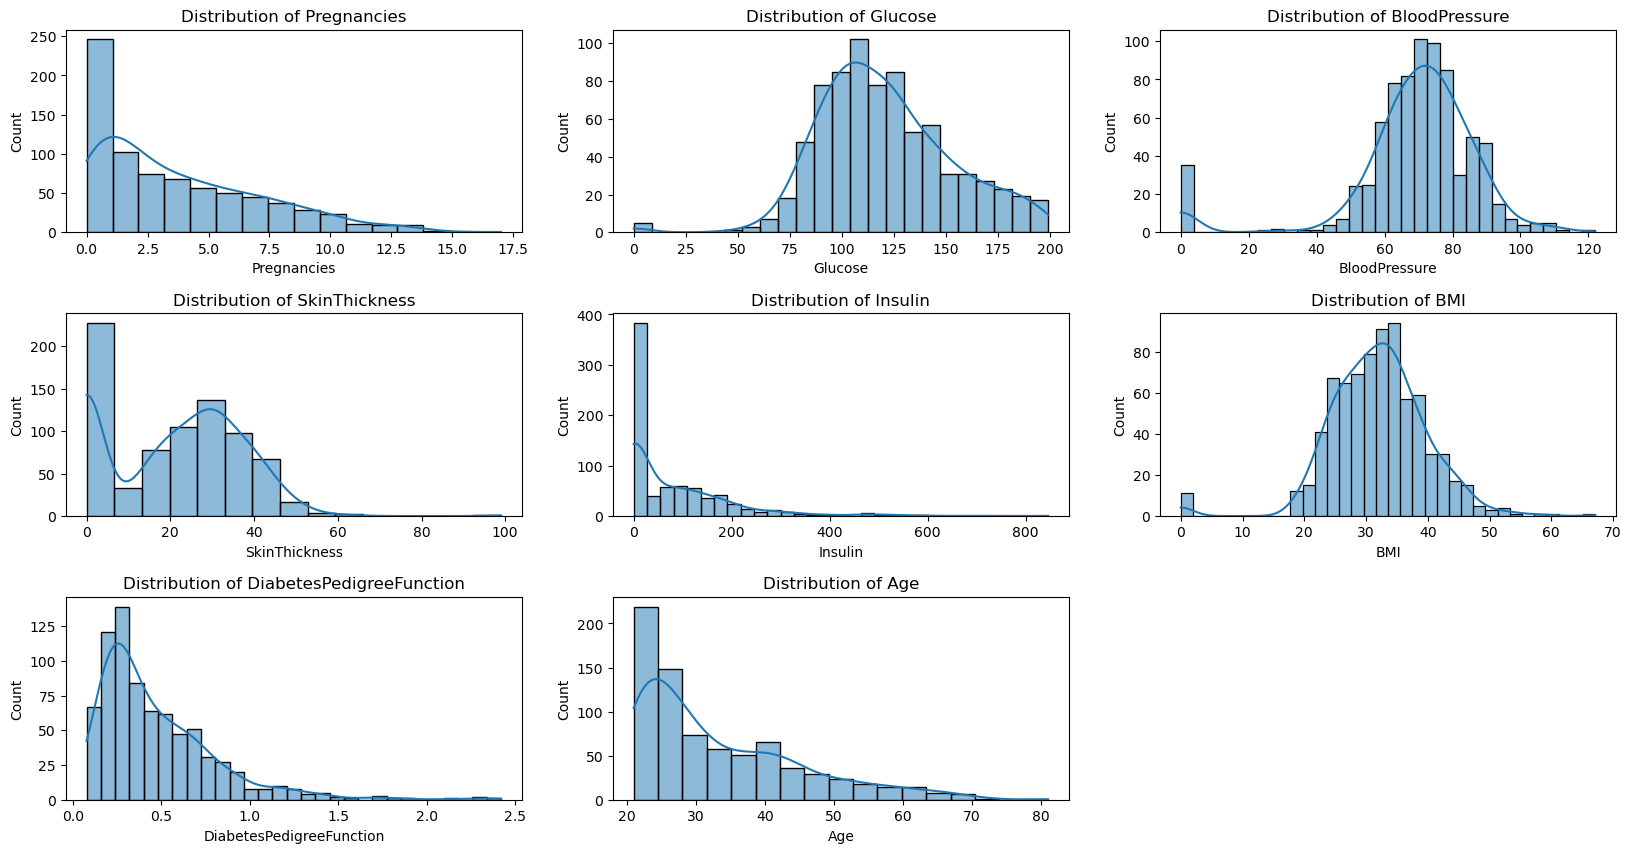

In [10]:
column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize = (20,10))
for i,col in enumerate(column): 
    plt.subplot(3,3,i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.subplots_adjust(hspace =0.4)

<h5> From the above graph it can be seen that most of the graphs are skewed lets check the skewness using the skew() fn.
<h5> And if the skew value is greater then 0.5 or less than -0.5 will transform the data

In [11]:
skew_values = data[column].skew()

print(skew_values)

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64


<h5> Columns Pregnancies,DiabetesPedigreeFunction,Age,Insulin are highly positively skewed and require transformation</h5>
<h5> Column BloodPressure is highly negatively skewed and require transformation

<h2> Correcting the Skewness

In [27]:
#for Positive skew
data['Insulin_log'] = np.log1p(data['Insulin'])
data['Pregnancies_log'] = np.log1p(data['Pregnancies'])
data['DiabetesPedigreeFunction_log'], _  = stats.boxcox(data['DiabetesPedigreeFunction'])
data['Age_log'] = np.log1p(data['Age'])

# for negative skew
data['BloodPressure_log'] = np.square(data['BloodPressure'])

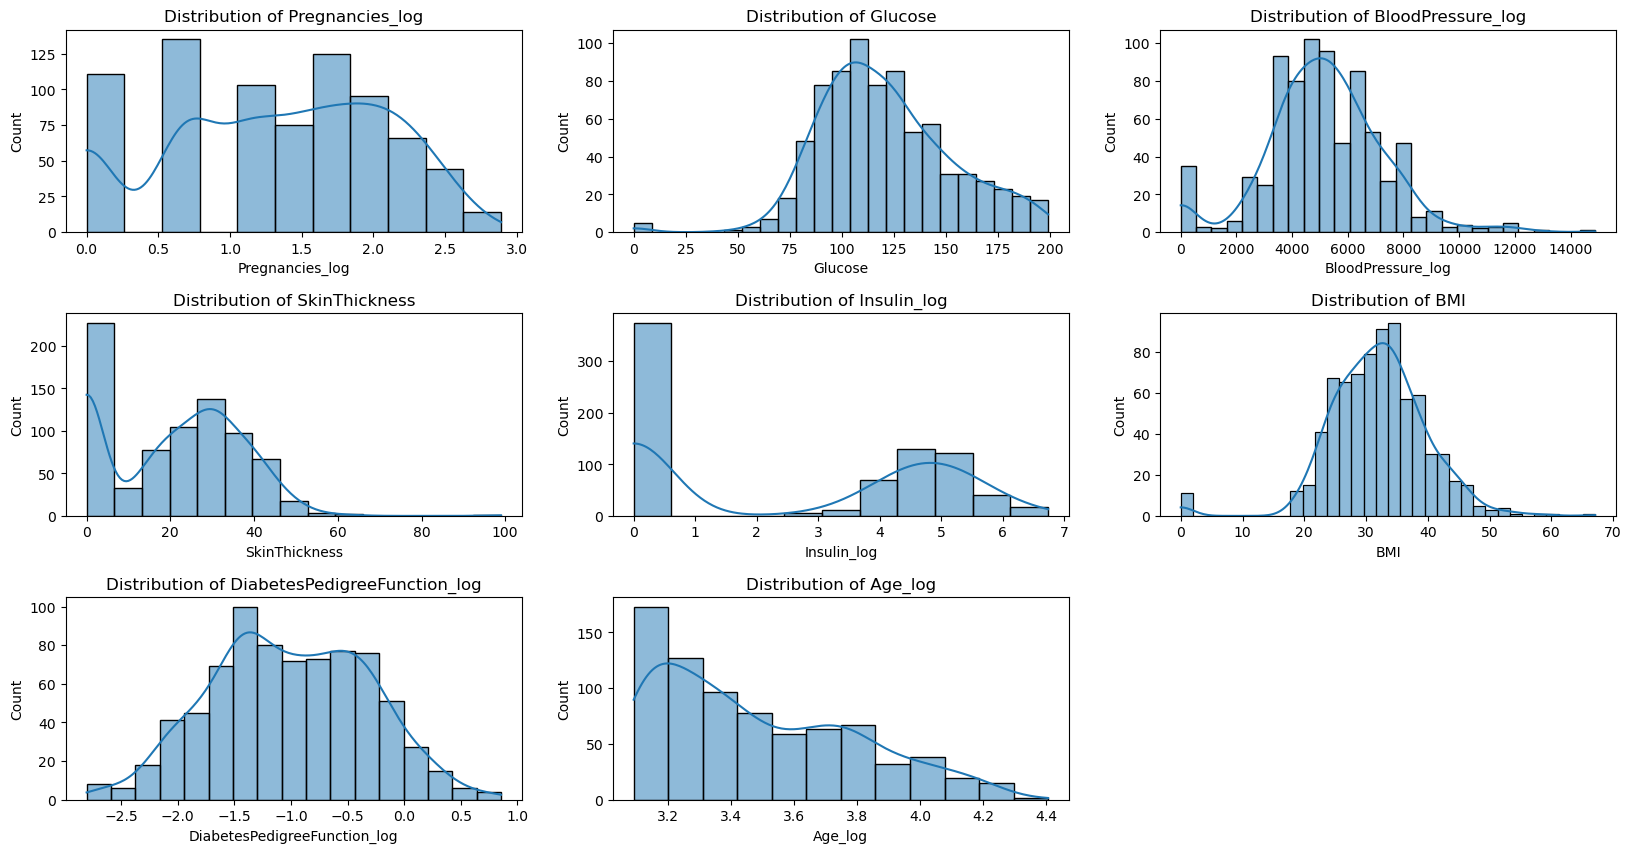

In [28]:
transformed_column = ['Pregnancies_log', 'Glucose', 'BloodPressure_log', 'SkinThickness', 'Insulin_log','BMI', 'DiabetesPedigreeFunction_log', 'Age_log']

plt.figure(figsize = (20,10))
for i,col in enumerate(transformed_column): 
    plt.subplot(3,3,i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.subplots_adjust(hspace =0.4)

In [29]:
skew_values = data[transformed_column].skew()

print(skew_values)

Pregnancies_log                -0.243478
Glucose                         0.173754
BloodPressure_log               0.122836
SkinThickness                   0.109372
Insulin_log                     0.065978
BMI                            -0.428982
DiabetesPedigreeFunction_log    0.007927
Age_log                         0.614664
dtype: float64


<H4> data is now almost normal lets proceed further

In [30]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_log,Pregnancies_log,DiabetesPedigreeFunction_log,Age_log,BloodPressure_log
0,6,148,72,35,0,33.6,0.627,50,1,0.000000,1.945910,-0.474866,3.931826,5184
1,1,85,66,29,0,26.6,0.351,31,0,0.000000,0.693147,-1.088080,3.465736,4356
2,8,183,64,0,0,23.3,0.672,32,1,0.000000,2.197225,-0.403329,3.496508,4096
3,1,89,66,23,94,28.1,0.167,21,0,4.553877,0.693147,-1.912132,3.091042,4356
4,0,137,40,35,168,43.1,2.288,33,1,5.129899,0.000000,0.803134,3.526361,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,5.198497,2.397895,-1.885177,4.158883,5776
764,2,122,70,27,0,36.8,0.340,27,0,0.000000,1.098612,-1.122493,3.332205,4900
765,5,121,72,23,112,26.2,0.245,30,0,4.727388,1.791759,-1.481354,3.433987,5184
766,1,126,60,0,0,30.1,0.349,47,1,0.000000,0.693147,-1.094250,3.871201,3600


<h2> Splitting the data and standerdizing the data for model training

In [31]:
X= data[['Pregnancies_log','Glucose','BloodPressure_log','SkinThickness','Insulin_log','BMI','DiabetesPedigreeFunction_log','Age_log']]
y = data['Outcome']

In [33]:
standerizer = StandardScaler()
standerizer_X = standerizer.fit_transform(X)

In [34]:
print(standerizer_X)

[[ 0.82578131  0.84832379  0.01621941 ...  0.20401277  0.77675354
   1.43776741]
 [-0.80260428 -1.12339636 -0.37560473 ... -0.68442195 -0.11223367
  -0.05057458]
 [ 1.15244868  1.94372388 -0.49864129 ... -1.10325546  0.88046148
   0.04768708]
 ...
 [ 0.6254108   0.00330087  0.01621941 ... -0.73518964 -0.68236908
  -0.15195618]
 [-0.80260428  0.1597866  -0.73335719 ... -0.24020459 -0.12117864
   1.24417772]
 [-0.80260428 -0.8730192  -0.11817438 ... -0.20212881 -0.28226385
  -0.96921595]]


In [35]:
X = standerizer_X
y = data['Outcome']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [37]:
model = svm.SVC(kernel='linear')

In [38]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [39]:
y_train_pred = model.predict(X_train)

In [40]:
training_data_acc = accuracy_score(y_train,y_train_pred)
print(training_data_acc)

0.7768729641693811


In [41]:
y_test_pred = model.predict(X_test)
test_data_acc = accuracy_score(y_test_pred,y_test)
print(test_data_acc)

0.7662337662337663


<h2>Conclusion:
<h3>The Support Vector Machine (SVM) with a linear kernel achieved an accuracy of 76.62%. This indicates that the model is correctly classifying around 76% of the test samples, but around 24% of the samples are misclassified.
<h3>76.62% accuracy is decent, but depending on the problem domain (e.g., medical diagnosis or fraud detection), this level of accuracy might need further improvement, especially if the cost of false positives/negatives is high.